<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>APRENDIZADO DE MÁQUINA (CIC1205/GCC1932) - Trabalho 2</center></h1>

- Nome completo: <ALEXANDER_RAMOS_FEITOSA>
- [Link para vídeo](<LINK_VIDEO>)

# QUESTÃO 01

### 1. Novas features: Volume e Log (Carat)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = pd.read_csv('data/diamonds.csv')

# Create new features
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds['log_carat'] = np.log(diamonds['carat'])

### 2. Justificativa:

1. Volume (x * y * z): 
   - Raciocínio: O volume de um diamante é uma característica física que reflete o tamanho tridimensional do diamante. Diamantes maiores geralmente têm preços mais altos, pois utilizam mais material bruto e são mais raros.
   - Justificativa: Essa feature pode ser útil para um modelo de regressão porque captura diretamente o tamanho físico do diamante, que é um fator importante na determinação do preço. Além disso, combina três variáveis (x, y, z) em uma única métrica, reduzindo a dimensionalidade e potencialmente melhorando a eficiência do modelo.

2. Log(Carat):
   - Raciocínio: A transformação logarítmica é frequentemente usada para lidar com distribuições assimétricas. O peso em quilates (carat) tende a ser altamente assimétrico, com muitos diamantes pequenos e poucos diamantes grandes.
   - Justificativa: A transformação logarítmica normaliza a distribuição de carat, tornando-a mais simétrica. Isso pode melhorar o desempenho do modelo de regressão, pois muitos algoritmos assumem que as variáveis têm distribuições aproximadamente normais. Além disso, a relação entre carat e preço pode ser não-linear, e a transformação logarítmica ajuda a capturar essa relação de forma mais eficaz.

### 3. Visualização Exploratória

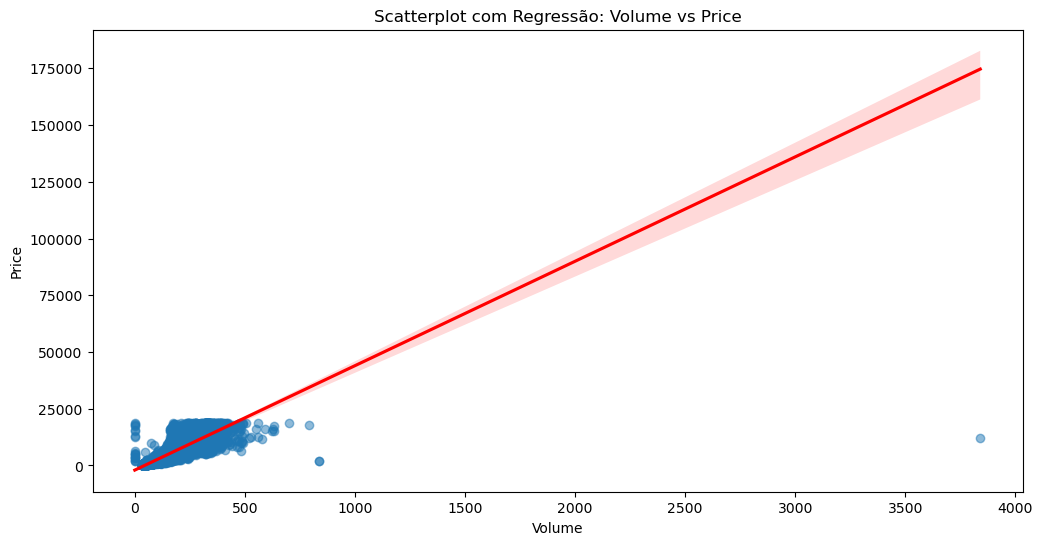

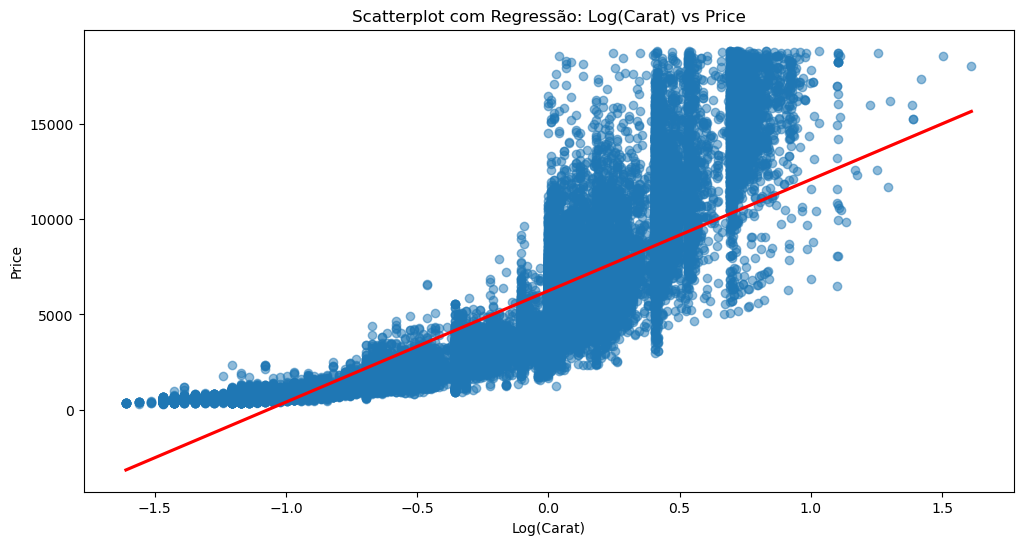

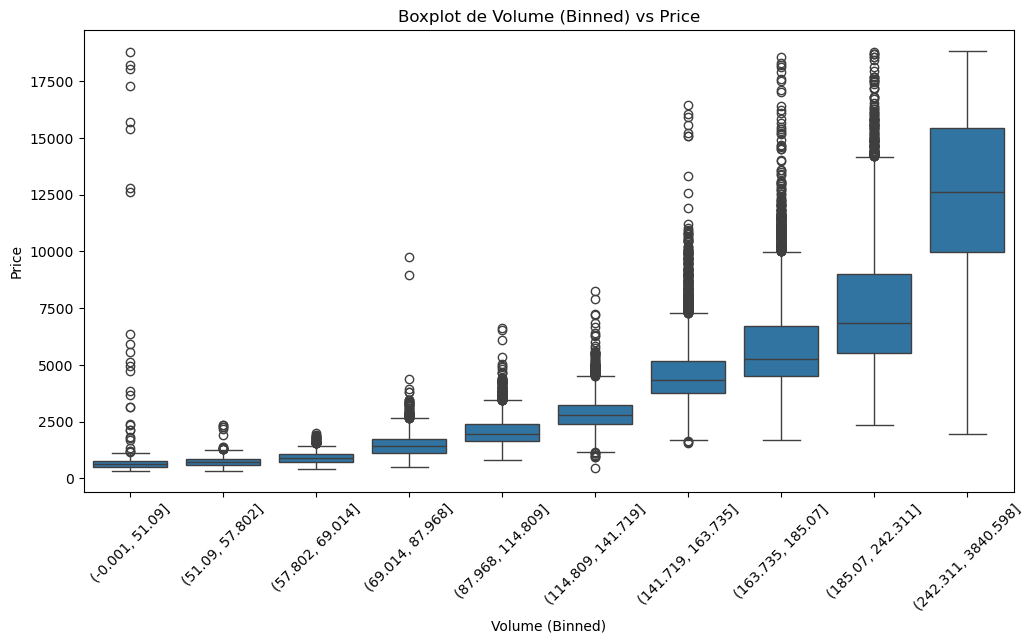

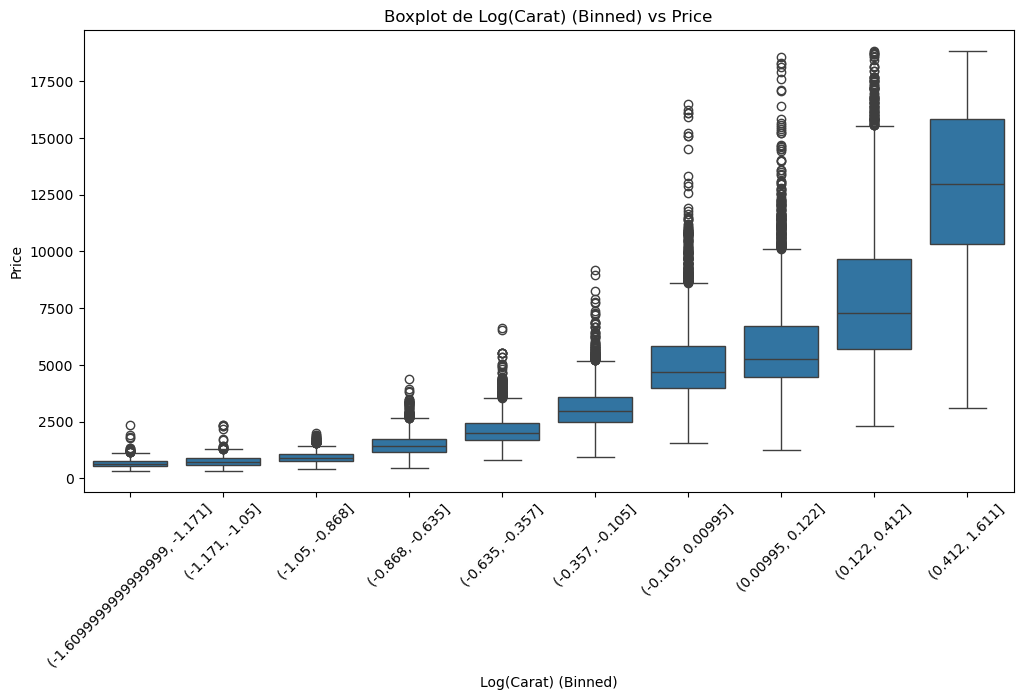

In [4]:
# Visualize the relationships

# Scatterplot with regression line for volume vs price
plt.figure(figsize=(12, 6))
sns.regplot(x='volume', y='price', data=diamonds, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatterplot com Regressão: Volume vs Price')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

# Scatterplot with regression line for log_carat vs price
plt.figure(figsize=(12, 6))
sns.regplot(x='log_carat', y='price', data=diamonds, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatterplot com Regressão: Log(Carat) vs Price')
plt.xlabel('Log(Carat)')
plt.ylabel('Price')
plt.show()

# Boxplot for volume vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.qcut(diamonds['volume'], q=10), y='price', data=diamonds)
plt.xticks(rotation=45)
plt.title('Boxplot de Volume (Binned) vs Price')
plt.xlabel('Volume (Binned)')
plt.ylabel('Price')
plt.show()

# Boxplot for log_carat vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.qcut(diamonds['log_carat'], q=10), y='price', data=diamonds)
plt.xticks(rotation=45)
plt.title('Boxplot de Log(Carat) (Binned) vs Price')
plt.xlabel('Log(Carat) (Binned)')
plt.ylabel('Price')
plt.show()

# QUESTÃO 02

### Carregando A652.pickle para conhecer a distribuição

In [5]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

with open('data/A652.pickle', 'rb') as f:
    obj = pickle.load(f)


X_train, y_train = obj[0], obj[1].ravel()
X_test, y_test = obj[2], obj[3].ravel()
X_val, y_val = obj[4], obj[5].ravel()

df_train = pd.DataFrame(X_train)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test)
df_test['label'] = y_test

df_val = pd.DataFrame(X_val)
df_val['label'] = y_val

# 1. Basic statistics for training, validation and test sets
print("=== Training Set Statistics ===")
print(f"Shape: {df_train.shape}")
print("\nSummary Statistics:")
print(df_train.describe())
print("\nLabel Distribution:")
print(df_train['label'].value_counts().sort_index())

print("\n=== Validation Set Statistics ===")
print(f"Shape: {df_val.shape}")
print("\nLabel Distribution:")
print(df_val['label'].value_counts().sort_index())

print("\n=== Test Set Statistics ===")
print(f"Shape: {df_test.shape}")
print("\nLabel Distribution:")
print(df_test['label'].value_counts().sort_index())

df_train['label'] = df_train['label'].astype('category')
df_val['label'] = df_val['label'].astype('category')
df_test['label'] = df_test['label'].astype('category')

=== Training Set Statistics ===
Shape: (10012, 25)

Summary Statistics:
                  0             1             2             3             4  \
count  10012.000000  10012.000000  10012.000000  10012.000000  10012.000000   
mean       0.348376      0.471106      0.745698      0.480345      0.328346   
std        0.135050      0.160000      0.123782      0.111946      0.081178   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.253731      0.363265      0.666667      0.416352      0.279300   
50%        0.328358      0.465306      0.763889      0.471203      0.310884   
75%        0.432836      0.571429      0.833333      0.550553      0.358472   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  10012.000000  10012.000000  10012.000000  10012.000000  10012.000000   
mean       0.498483      0.498396      0.005045      0.348

### Discretizando as variáveis

Training Set Distribution:
precipitation_category
MODERATE      88
NONE        9258
STRONG         2
WEAK         664
Name: count, dtype: int64

Validation Set Distribution:
precipitation_category
EXTREME        2
MODERATE      50
NONE        8769
STRONG         4
WEAK         757
Name: count, dtype: int64

Test Set Distribution:
precipitation_category
MODERATE       6
NONE        2277
STRONG         1
WEAK         222
Name: count, dtype: int64


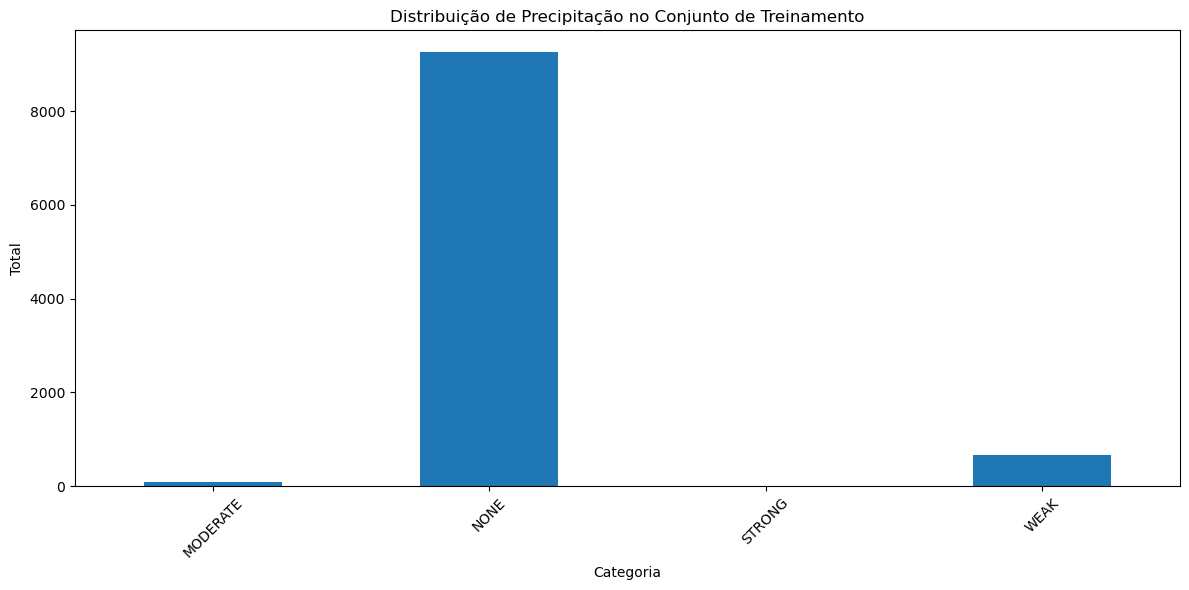

In [6]:
def map_to_category(value):
    if value == 0:
        return 'NONE'
    elif 0 < value <= 5:
        return 'WEAK'
    elif 5 < value <= 25:
        return 'MODERATE'
    elif 25 < value <= 50:
        return 'STRONG'
    else:
        return 'EXTREME'

# Apply the mapping to each dataset
df_train['precipitation_category'] = df_train['label'].apply(map_to_category)
df_val['precipitation_category'] = df_val['label'].apply(map_to_category)
df_test['precipitation_category'] = df_test['label'].apply(map_to_category)

# Display the distribution of categories in each dataset
print("Training Set Distribution:")
print(df_train['precipitation_category'].value_counts().sort_index())
print("\nValidation Set Distribution:")
print(df_val['precipitation_category'].value_counts().sort_index())
print("\nTest Set Distribution:")
print(df_test['precipitation_category'].value_counts().sort_index())

# Create a bar plot to visualize the distribution
plt.figure(figsize=(12, 6))
df_train['precipitation_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Precipitação no Conjunto de Treinamento')
plt.xlabel('Categoria')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Treinando os modelos Ordinal e Flat

Class weights: {0: np.float64(0.2703607690645928), 1: np.float64(3.769578313253012), 2: np.float64(28.443181818181817), 3: np.float64(1251.5)}


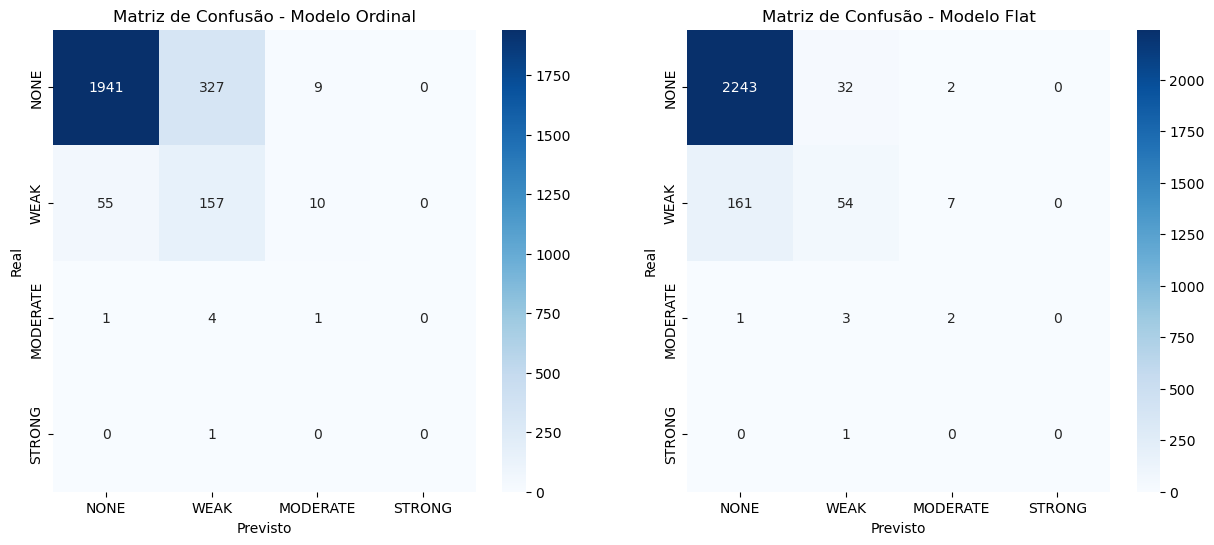


Classification Report (Modelo Ordinal):
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2277
           1       0.32      0.71      0.44       222
           2       0.05      0.17      0.08         6
           3       0.00      0.00      0.00         1

    accuracy                           0.84      2506
   macro avg       0.34      0.43      0.36      2506
weighted avg       0.91      0.84      0.86      2506


Classification report (Modelo Flat):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2277
           1       0.60      0.24      0.35       222
           2       0.18      0.33      0.24         6
           3       0.00      0.00      0.00         1

    accuracy                           0.92      2506
   macro avg       0.43      0.39      0.38      2506
weighted avg       0.90      0.92      0.90      2506



b:\TechLab\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
b:\TechLab\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
b:\TechLab\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
b:\TechLab\miniconda3\Lib\site-packag

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics import confusion_matrix, classification_report

# Define category mapping first
category_mapping = {
    'NONE': 0,
    'WEAK': 1,
    'MODERATE': 2,
    'STRONG': 3,
    'EXTREME': 4
}

# Create ordinal labels
y_train_ordinal = np.array([category_mapping[map_to_category(y)] for y in y_train])
y_val_ordinal = np.array([category_mapping[map_to_category(y)] for y in y_val])
y_test_ordinal = np.array([category_mapping[map_to_category(y)] for y in y_test])

class OrdinalBinaryDecompositionWithWeights(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=None, class_weights=None):
        self.base_classifier = base_classifier
        self.class_weights = class_weights
        self.classifiers = []
        
    def fit(self, X, y):
        n_classes = len(np.unique(y))
        self.classifiers = []
        
        for i in range(n_classes - 1):
            # Create binary labels for current threshold
            binary_y = (y > i).astype(int)
            
            # Calculate sample weights based on class weights
            if self.class_weights is not None:
                sample_weights = np.ones(len(y))
                for class_label, weight in enumerate(self.class_weights):
                    sample_weights[y == class_label] = weight
            else:
                sample_weights = None
            
            # Clone and fit classifier
            classifier = clone(self.base_classifier)
            classifier.fit(X, binary_y, sample_weight=sample_weights)
            self.classifiers.append(classifier)
        
        return self
    
    def predict(self, X):
        probas = []
        for clf in self.classifiers:
            probas.append(clf.predict_proba(X)[:, 1])
        
        probas = np.array(probas).T
        return np.sum(probas >= 0.5, axis=1)

# Calculate class weights
class_counts = np.bincount(y_train_ordinal)
class_weights = len(y_train_ordinal) / (len(np.unique(y_train_ordinal)) * class_counts)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class weights:", class_weight_dict)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize base classifier
base_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Initialize and train ordinal classifier
ordinal_clf = OrdinalBinaryDecompositionWithWeights(
    base_classifier=base_clf,
    class_weights=class_weights
)

# Train the ordinal classifier
ordinal_clf.fit(X_train_scaled, y_train_ordinal)

# Make predictions
y_train_pred_ord = ordinal_clf.predict(X_train_scaled)
y_test_pred_ord = ordinal_clf.predict(X_test_scaled)

# Initialize and train flat classifier
flat_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
flat_clf.fit(X_train_scaled, y_train_ordinal)

# Make predictions
y_test_pred_flat = flat_clf.predict(X_test_scaled)

# Compute confusion matrices
cm_ordinal = confusion_matrix(y_test_ordinal, y_test_pred_ord)
cm_flat = confusion_matrix(y_test_ordinal, y_test_pred_flat)

# Create labels for the confusion matrices
labels = ['NONE', 'WEAK', 'MODERATE', 'STRONG']

# Plot confusion matrices
plt.figure(figsize=(15, 6))

# Plot Ordinal Model confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_ordinal, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão - Modelo Ordinal')
plt.xlabel('Previsto')
plt.ylabel('Real')

# Plot Flat GB Model confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_flat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão - Modelo Flat')
plt.xlabel('Previsto')
plt.ylabel('Real')

#plt.tight_layout()
plt.show()

#Print classification report
print("\nClassification Report (Modelo Ordinal):")
print(classification_report(y_test_ordinal, y_test_pred_ord))
print("\nClassification report (Modelo Flat):")
print(classification_report(y_test_ordinal, y_test_pred_flat))

### Análise de Resultados

In [8]:
# Análise de resultados

# Criar um DataFrame com os resultados por categoria
results = pd.DataFrame({
    'Categoria': ['NONE', 'WEAK', 'MODERATE', 'STRONG', 'EXTREME'],
    'Total Treinamento': [
        (df_train['precipitation_category'] == 'NONE').sum(),
        (df_train['precipitation_category'] == 'WEAK').sum(),
        (df_train['precipitation_category'] == 'MODERATE').sum(),
        (df_train['precipitation_category'] == 'STRONG').sum(),
        (df_train['precipitation_category'] == 'EXTREME').sum()
    ],
    'Total Validação': [
        (df_val['precipitation_category'] == 'NONE').sum(),
        (df_val['precipitation_category'] == 'WEAK').sum(),
        (df_val['precipitation_category'] == 'MODERATE').sum(),
        (df_val['precipitation_category'] == 'STRONG').sum(),
        (df_val['precipitation_category'] == 'EXTREME').sum()
    ],
    'Total Teste': [
        (df_test['precipitation_category'] == 'NONE').sum(),
        (df_test['precipitation_category'] == 'WEAK').sum(),
        (df_test['precipitation_category'] == 'MODERATE').sum(),
        (df_test['precipitation_category'] == 'STRONG').sum(),
        (df_test['precipitation_category'] == 'EXTREME').sum()
    ]
})

print("Distribuição das classes nos conjuntos:")
print(results)

print("\nAnálise comparativa dos modelos:")
print("\n1. Modelo Ordinal:")
print(f"Acurácia global: 84%")
print("Pontos fortes:")
print("- Boa detecção de NONE (recall 85%)")
print("- Melhor recall para WEAK (71%)")
print("Pontos fracos:")
print("- Baixa precisão para MODERATE (5%)")
print("- Não detectou STRONG")

print("\n2. Modelo Flat:")
print(f"Acurácia global: 92%")
print("Pontos fortes:")
print("- Excelente detecção de NONE (recall 99%)")
print("- Melhor precisão para WEAK (60%)")
print("Pontos fracos:")
print("- Baixo recall para WEAK (25%)")
print("- Baixa performance em MODERATE e STRONG")

print("\nConclusões principais:")
print("1. Desbalanceamento severo das classes:")
print(f"- NONE: {results.iloc[0]['Total Treinamento']} amostras")
print(f"- WEAK: {results.iloc[1]['Total Treinamento']} amostras")
print(f"- MODERATE: {results.iloc[2]['Total Treinamento']} amostras")
print(f"- STRONG/EXTREME: apenas {results.iloc[3]['Total Treinamento'] + results.iloc[4]['Total Treinamento']} amostras")

print("\n2. Trade-offs entre os modelos:")
print("- Modelo Ordinal: melhor em detectar classes minoritárias (maior recall)")
print("- Modelo Flat: melhor acurácia global, mas prejudicado no balanceamento")

Distribuição das classes nos conjuntos:
  Categoria  Total Treinamento  Total Validação  Total Teste
0      NONE               9258             8769         2277
1      WEAK                664              757          222
2  MODERATE                 88               50            6
3    STRONG                  2                4            1
4   EXTREME                  0                2            0

Análise comparativa dos modelos:

1. Modelo Ordinal:
Acurácia global: 84%
Pontos fortes:
- Boa detecção de NONE (recall 85%)
- Melhor recall para WEAK (71%)
Pontos fracos:
- Baixa precisão para MODERATE (5%)
- Não detectou STRONG

2. Modelo Flat:
Acurácia global: 92%
Pontos fortes:
- Excelente detecção de NONE (recall 99%)
- Melhor precisão para WEAK (60%)
Pontos fracos:
- Baixo recall para WEAK (25%)
- Baixa performance em MODERATE e STRONG

Conclusões principais:
1. Desbalanceamento severo das classes:
- NONE: 9258 amostras
- WEAK: 664 amostras
- MODERATE: 88 amostras
- STRONG/EXTREME

# QUESTÃO 4

### Recarregando o dataset original

In [11]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
obj = pickle.load(open('data/A652.pickle', 'rb'))

# Split into train, validation and test
X_train, y_train = obj[0], obj[1].ravel()
X_test, y_test = obj[2], obj[3].ravel()
X_val, y_val = obj[4], obj[5].ravel()

df_train = pd.DataFrame(X_train)
df_train['label'] = y_train

df_test = pd.DataFrame(X_test)
df_test['label'] = y_test

df_val = pd.DataFrame(X_val)
df_val['label'] = y_val

# 1. Basic statistics for training, validation and test sets
print("=== Training Set Statistics ===")
print(f"Shape: {df_train.shape}")
print("\nSummary Statistics:")
print(df_train.describe())
print("\nLabel Distribution:")
print(df_train['label'].value_counts().sort_index())

print("\n=== Validation Set Statistics ===")
print(f"Shape: {df_val.shape}")
print("\nLabel Distribution:")
print(df_val['label'].value_counts().sort_index())

print("\n=== Test Set Statistics ===")
print(f"Shape: {df_test.shape}")
print("\nLabel Distribution:")
print(df_test['label'].value_counts().sort_index())

df_train['label'] = df_train['label'].astype('category')
df_val['label'] = df_val['label'].astype('category')
df_test['label'] = df_test['label'].astype('category')

=== Training Set Statistics ===
Shape: (10012, 25)

Summary Statistics:
                  0             1             2             3             4  \
count  10012.000000  10012.000000  10012.000000  10012.000000  10012.000000   
mean       0.348376      0.471106      0.745698      0.480345      0.328346   
std        0.135050      0.160000      0.123782      0.111946      0.081178   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.253731      0.363265      0.666667      0.416352      0.279300   
50%        0.328358      0.465306      0.763889      0.471203      0.310884   
75%        0.432836      0.571429      0.833333      0.550553      0.358472   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  10012.000000  10012.000000  10012.000000  10012.000000  10012.000000   
mean       0.498483      0.498396      0.005045      0.348

### Encontrando o melhor k

n_components=2, validation score=0.9149, explained variance=0.4291
n_components=3, validation score=0.9134, explained variance=0.5650
n_components=4, validation score=0.9183, explained variance=0.6689
n_components=5, validation score=0.9180, explained variance=0.7694
n_components=6, validation score=0.9183, explained variance=0.8347
n_components=7, validation score=0.9186, explained variance=0.8746
n_components=8, validation score=0.9249, explained variance=0.9033
n_components=9, validation score=0.9230, explained variance=0.9307
n_components=10, validation score=0.9259, explained variance=0.9493
n_components=11, validation score=0.9266, explained variance=0.9650
n_components=12, validation score=0.9255, explained variance=0.9741
n_components=13, validation score=0.9243, explained variance=0.9823
n_components=14, validation score=0.9247, explained variance=0.9902
n_components=15, validation score=0.9238, explained variance=0.9941
n_components=16, validation score=0.9251, explained vari

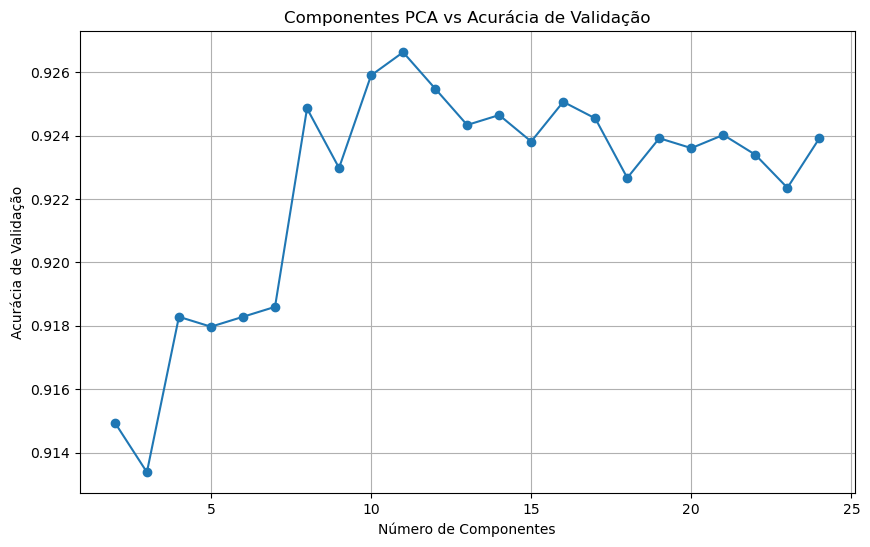


Melhor número de componentes: 11
Melhor score de validação: 0.9266


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# First, let's discretize the continuous labels into classes
def discretize_precipitation(value):
    if value == 0:
        return 0  # NONE
    elif 0 < value <= 5:
        return 1  # WEAK
    elif 5 < value <= 25:
        return 2  # MODERATE
    elif 25 < value <= 50:
        return 3  # STRONG
    else:
        return 4  # EXTREME

# Convert continuous labels to discrete classes
y_train_disc = np.array([discretize_precipitation(y) for y in y_train])
y_val_disc = np.array([discretize_precipitation(y) for y in y_val])
y_test_disc = np.array([discretize_precipitation(y) for y in y_test])

# Original datasets (D1)
X_train_feat = X_train
X_val_feat = X_val
X_test_feat = X_test

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_val_scaled = scaler.transform(X_val_feat)
X_test_scaled = scaler.transform(X_test_feat)

# Try different numbers of components
n_components_range = range(2, X_train_scaled.shape[1] + 1)
val_scores = []

for n in n_components_range:
    # Apply PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    
    # Train GradientBoostingClassifier
    clf = GradientBoostingClassifier(random_state=42)
    clf.fit(X_train_pca, y_train_disc)
    
    # Evaluate on validation set
    val_score = clf.score(X_val_pca, y_val_disc)
    val_scores.append(val_score)
    
    # Print explained variance ratio
    explained_var = np.sum(pca.explained_variance_ratio_)
    print(f"n_components={n}, validation score={val_score:.4f}, explained variance={explained_var:.4f}")

# Plot validation scores
plt.figure(figsize=(10, 6))
plt.plot(list(n_components_range), val_scores, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Acurácia de Validação')
plt.title('Componentes PCA vs Acurácia de Validação')
plt.grid(True)
plt.show()

# Find best number of components
best_n_components = n_components_range[np.argmax(val_scores)]
print(f"\nMelhor número de componentes: {best_n_components}")
print(f"Melhor score de validação: {max(val_scores):.4f}")

### Ajustando D1 e D2

Classification Report - Original Data (D1):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2277
           1       0.60      0.24      0.35       222
           2       0.18      0.33      0.24         6
           3       0.00      0.00      0.00         1

    accuracy                           0.92      2506
   macro avg       0.43      0.39      0.38      2506
weighted avg       0.90      0.92      0.90      2506


Classification Report - PCA-transformed Data (D2):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2277
           1       0.68      0.44      0.53       222
           2       0.14      0.17      0.15         6
           3       0.00      0.00      0.00         1

    accuracy                           0.93      2506
   macro avg       0.44      0.40      0.41      2506
weighted avg       0.92      0.93      0.92      2506



b:\TechLab\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
b:\TechLab\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
b:\TechLab\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
b:\TechLab\miniconda3\Lib\site-packag

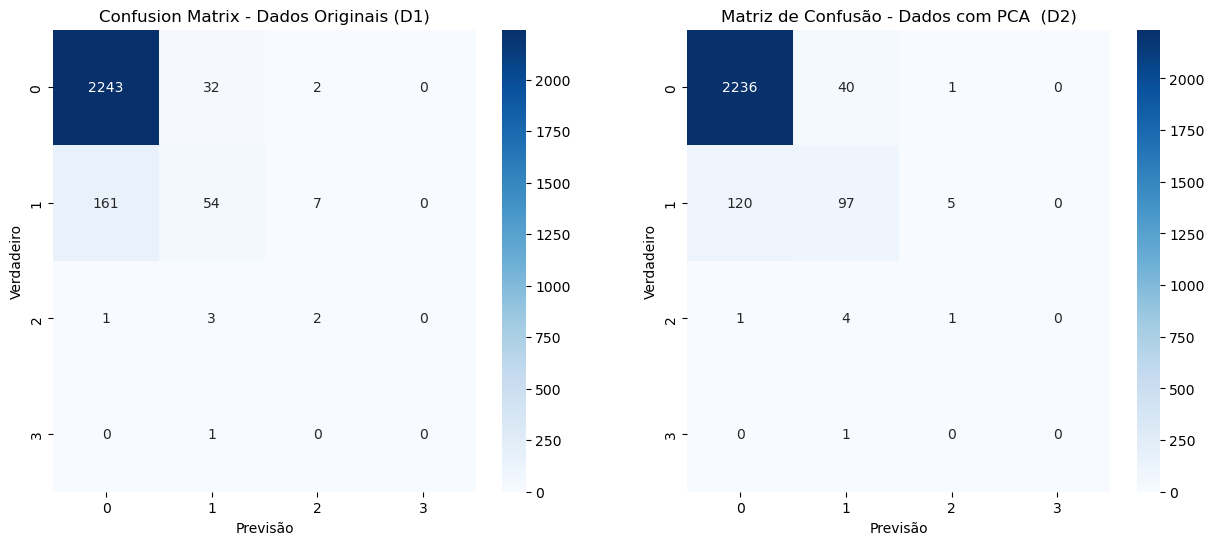

In [13]:
from sklearn.metrics import confusion_matrix



# Apply PCA with best number of components to create D2
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train model on original data (D1)
clf_original = GradientBoostingClassifier(random_state=42)
clf_original.fit(X_train_scaled, y_train_disc)

# Train model on PCA-transformed data (D2)
clf_pca = GradientBoostingClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_disc)

# Make predictions
y_test_pred_original = clf_original.predict(X_test_scaled)
y_test_pred_pca = clf_pca.predict(X_test_pca)

# Print classification reports
print("Classification Report - Original Data (D1):")
print(classification_report(y_test_disc, y_test_pred_original))

print("\nClassification Report - PCA-transformed Data (D2):")
print(classification_report(y_test_disc, y_test_pred_pca))

# Plot confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Confusion matrix for original data
sns.heatmap(confusion_matrix(y_test_disc, y_test_pred_original), 
            annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Confusion Matrix - Dados Originais (D1)')
ax1.set_xlabel('Previsão')
ax1.set_ylabel('Verdadeiro')

# Confusion matrix for PCA data
sns.heatmap(confusion_matrix(y_test_disc, y_test_pred_pca), 
            annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('Matriz de Confusão - Dados com PCA  (D2)')
ax2.set_xlabel('Previsão')
ax2.set_ylabel('Verdadeiro')

#plt.tight_layout()
plt.show()

### Comparando os modelos

Comparative Analysis of Models:

Metric               Original (D1)    PCA (D2)
--------------------------------------------------
Accuracy            0.9178         0.9310
Weighted Precision  0.9017         0.9224
Weighted Recall     0.9178         0.9310
Weighted F1-Score   0.9025         0.9241
Mean Absolute Error 0.0838         0.0702

Class Distribution in Predictions:

Original Model (D1):
[2404   91   11]

PCA Model (D2):
[2356  143    7]

Cumulative explained variance ratio with 11 components:
0.9650

Top 5 most important features in original model:
    feature  importance
23       23    0.593796
15       15    0.047542
19       19    0.041234
18       18    0.034706
20       20    0.030238


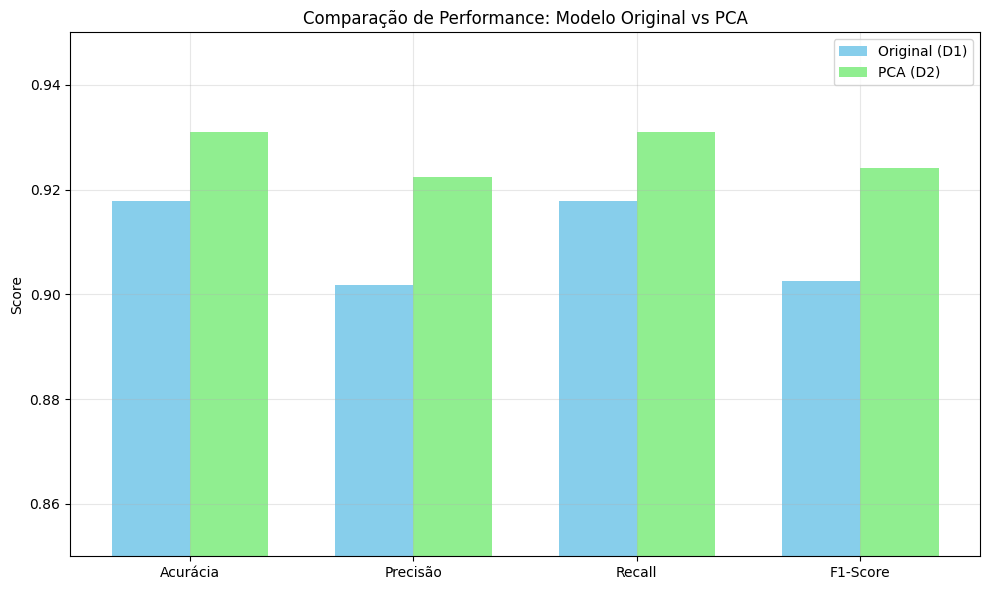

In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, mean_absolute_error

# Calculate detailed metrics for both models
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    mae = mean_absolute_error(y_true, y_pred)
    return accuracy, precision, recall, f1, mae

# Calculate metrics for both models
metrics_original = calculate_metrics(y_test_disc, y_test_pred_original)
metrics_pca = calculate_metrics(y_test_disc, y_test_pred_pca)

# Print comparison
print("Comparative Analysis of Models:\n")
print("Metric               Original (D1)    PCA (D2)")
print("-" * 50)
print(f"Accuracy            {metrics_original[0]:.4f}         {metrics_pca[0]:.4f}")
print(f"Weighted Precision  {metrics_original[1]:.4f}         {metrics_pca[1]:.4f}")
print(f"Weighted Recall     {metrics_original[2]:.4f}         {metrics_pca[2]:.4f}")
print(f"Weighted F1-Score   {metrics_original[3]:.4f}         {metrics_pca[3]:.4f}")
print(f"Mean Absolute Error {metrics_original[4]:.4f}         {metrics_pca[4]:.4f}")

# Calculate class-wise predictions
print("\nClass Distribution in Predictions:")
print("\nOriginal Model (D1):")
print(np.bincount(y_test_pred_original))
print("\nPCA Model (D2):")
print(np.bincount(y_test_pred_pca))

# Calculate explained variance ratio for PCA components
print(f"\nCumulative explained variance ratio with {best_n_components} components:")
print(f"{np.sum(pca.explained_variance_ratio_):.4f}")

# Feature importance for original model
feature_importance = pd.DataFrame({
    'feature': list(range(X_train_scaled.shape[1])),
    'importance': clf_original.feature_importances_
})
print("\nTop 5 most important features in original model:")
print(feature_importance.nlargest(5, 'importance'))

# Visualize the comparison of performance metrics
metrics_names = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
original_scores = [metrics_original[0], metrics_original[1], metrics_original[2], metrics_original[3]]
pca_scores = [metrics_pca[0], metrics_pca[1], metrics_pca[2], metrics_pca[3]]

plt.figure(figsize=(10, 6))
x = np.arange(len(metrics_names))
width = 0.35

plt.bar(x - width/2, original_scores, width, label='Original (D1)', color='skyblue')
plt.bar(x + width/2, pca_scores, width, label='PCA (D2)', color='lightgreen')

plt.ylabel('Score')
plt.title('Comparação de Performance: Modelo Original vs PCA')
plt.xticks(x, metrics_names)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.85, 0.95)  # Adjusted to better show the differences

plt.tight_layout()
plt.show()

# QUESTÃO 5

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=eeeefda8-9004-4f05-b242-3129315d35c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# 1. Carrega o dataset
diamonds = pd.read_csv('data/diamonds.csv')
if 'Unnamed: 0' in diamonds.columns:
    diamonds = diamonds.drop(columns=['Unnamed: 0'])

# 2. Codifica variáveis categóricas
categorical_columns = ['cut', 'color', 'clarity']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    diamonds[col] = le.fit_transform(diamonds[col])
    label_encoders[col] = le

# 3. Prepara features e alvo
X = diamonds.drop(columns=['price'])
y = diamonds['price']

# 4–6. Split em train (60%), calib (20%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# 7. Treina o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Resíduos no conjunto de calibração
calib_preds = model.predict(X_calib)
residuals_calib = np.abs(calib_preds - y_calib.values)

# 9. Quantil para 95% de confiança
alpha = 0.05
q_hat = np.quantile(residuals_calib, 1 - alpha)

# 10. Previsões e intervalos no teste
test_preds = model.predict(X_test)
lower_bounds = test_preds - q_hat
upper_bounds = test_preds + q_hat

# 11. DataFrame de resultados
prediction_intervals = pd.DataFrame({
    'Actual':        y_test.values,
    'Prediction':    test_preds,
    'Lower Bound':   lower_bounds,
    'Upper Bound':   upper_bounds,
    'Interval Width': upper_bounds - lower_bounds
}, index=y_test.index)

# 12. Adiciona coluna de resíduo
prediction_intervals['Residual'] = np.abs(prediction_intervals['Actual'] - prediction_intervals['Prediction'])

# 13. Imprime largura fixa dos intervalos
fixed_width = 2 * q_hat
print(f"Largura fixa de todos os intervalos de predição: {fixed_width:.3f}\n")

# 14. Encontra maior e menor resíduo
idx_max_resid = prediction_intervals['Residual'].idxmax()
idx_min_resid = prediction_intervals['Residual'].idxmin()

example_max_err = prediction_intervals.loc[idx_max_resid]
example_min_err = prediction_intervals.loc[idx_min_resid]

print("Exemplo com o MAIOR resíduo de previsão:")
print(example_max_err.to_frame().T)

print("\nExemplo com o MENOR resíduo de previsão:")
print(example_min_err.to_frame().T)

# 15. Métrica de MAE no teste
mae_test = mean_absolute_error(y_test, test_preds)
print(f"\nMAE no conjunto de teste: {mae_test:.3f}")


Largura fixa de todos os intervalos de predição: 2224.416

Exemplo com o MAIOR resíduo de previsão:
        Actual  Prediction  Lower Bound  Upper Bound  Interval Width  Residual
27673  18691.0    12121.38    11009.172    13233.588        2224.416   6569.62

Exemplo com o MENOR resíduo de previsão:
       Actual  Prediction  Lower Bound  Upper Bound  Interval Width  Residual
32730   802.0       802.0     -310.208     1914.208        2224.416       0.0

MAE no conjunto de teste: 275.470
